# Importação de bibliotecas

In [19]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from sklearn.decomposition import PCA

# import nltk
from nltk.corpus import stopwords

import numpy as np
import matplotlib.pyplot as plt

In [20]:
# nltk.download("stopwords")

# Leitura dos textos e pré-processamento

In [21]:
with open("data/Harry_Potter_e_A_Pedra_Filosofal.txt", encoding="utf-8") as f:
    text_content_1 = f.read()

with open("data/Harry_Potter_Camara_Secreta-br.txt", encoding="utf-8") as f:
    text_content_2 = f.read()

In [22]:
stop_words = set(stopwords.words('portuguese'))

def tokenize(text, remove_stopwords=True):
    if remove_stopwords:
        return [word for word in gensim.utils.tokenize(text, lower=True, deacc=True) if word not in stop_words]
    else:
        return list(gensim.utils.tokenize(text, lower=True, deacc=True))

In [23]:
# Tokenização (com lowercase + desacentuação + exclusão de stopwords)
# Nota: Utilizado apenas o conteúdo do primeiro documento nesta fase

sents = []
for sent in text_content_1.splitlines():
    sents.append(tokenize(sent))

# Visualizar as 10 primeiras frases do documento
print("Primeiras 10 frases do documento:")
for sent in sents[:10]:
    print(sent)

Primeiras 10 frases do documento:
['capitulo']
['menino', 'sobreviveu']
[]
['sr', 'sra', 'dursley', 'rua', 'alfeneiros', 'orgulhavam', 'dizer']
['perfeitamente', 'normais', 'bem', 'obrigado', 'ultimas', 'pessoas', 'mundo']
['esperaria', 'metessem', 'alguma', 'coisa', 'estranha', 'misteriosa', 'porque', 'simplesmente', 'nao']
['compactuavam', 'tipo', 'bobagem']
['sr', 'dursley', 'diretor', 'firma', 'chamada', 'grunnings', 'fazia', 'perfuracoes']
['homem', 'alto', 'corpulento', 'quase', 'pescoco', 'embora', 'enormes', 'bigodes', 'sra', 'dursley']
['magra', 'loura', 'pescoco', 'quase', 'duas', 'vezes', 'comprido', 'normal']


# Treino do modelo Word2Vec

In [24]:
model = Word2Vec(sents, vector_size=200, window=5, min_count=1, sg=1, epochs=20, workers=3, seed=13)  # seed fixa para testar o impacto de diferentes hiperparâmetros

In [25]:
def get_word(word, model):
    try:
        return model.wv[word]
    except KeyError:
        print("The word '" + word + "' does not appear in this model")

In [26]:
print(f"Resultado de get_word('dobby'):\n{get_word('dobby', model)}")  # Apenas presente no segundo documento
print("="*50)
print(f"Resultado de get_word('grifinoria'):\n{get_word('grifinoria', model)}")

The word 'dobby' does not appear in this model
Resultado de get_word('dobby'):
None
Resultado de get_word('grifinoria'):
[ 0.3476799  -0.07634708  0.35610065  0.0965843   0.2081715   0.26678857
 -0.37559023 -0.20860721 -0.29489386  0.2620407  -0.18658708 -0.0192799
  0.29111624  0.01529541  0.02267317 -0.01892079 -0.4578368   0.07359254
 -0.4896781  -0.03434021  0.3246675  -0.5459714   0.5260205   0.12812391
 -0.26970726  0.3253477  -0.17243467  0.46745798 -0.27967304 -0.41713992
  0.08439384 -0.03689884 -0.3016788   0.59667397  0.25325793  0.30081815
  0.06907018  0.23051205  0.15791288 -0.02355909  0.3001863   0.42675975
  0.299619   -0.30274767  0.00466533  0.00370185  0.5383449  -0.14779894
  0.2019171  -0.4441472  -0.16840357 -0.22115938  0.05656594 -0.06914234
  0.20854087  0.39044178 -0.08470216  0.07230695  0.12367465 -0.14644769
  0.04343315 -0.00703978  0.13945597  0.30958968  0.17446391  0.30729696
 -0.1399501   0.06393977  0.03694752  0.33697137  0.22398387 -0.14892182
 -0.

# Expansão do modelo

In [27]:
print(f"Tamanho da lista de word vectors original: {len(model.wv)}")

# Tokenização do segundo documento
more_sents = []
for sent in text_content_2.splitlines():
    more_sents.append(tokenize(sent))

# Aumento do vocabulário
model.build_vocab(more_sents, update=True)
model.train(more_sents, total_examples=model.corpus_count, epochs=model.epochs)

print(f"Tamanho da lista de word vectors após inclusão do segundo documento: {len(model.wv)}")
print("="*50)
print(f"Novo resultado para get_word('dobby'):\n{get_word('dobby', model)}")

Tamanho da lista de word vectors original: 8102
Tamanho da lista de word vectors após inclusão do segundo documento: 12382
Novo resultado para get_word('dobby'):
[-0.1095159  -0.23350604  0.27385497  0.4911702   0.37662417  0.7083379
 -0.34975418 -0.30935687  0.23389094  0.12698174 -0.4347622  -0.8715985
 -0.4883217  -0.3009306  -0.03191654 -0.30444893  0.4804213   0.29061309
 -0.40143114  0.41435274 -0.38473305  0.2152127   0.15037929 -0.6999245
  0.05500331  0.09666665  0.50877684  0.32115874 -0.48516     0.5532856
 -0.17056097  0.7500476   0.06762825 -0.00924845 -0.08654718 -0.11013674
 -0.4743219   0.10620144 -0.07634442  0.56737465  0.3491218   0.02933765
  0.09089277 -0.04410932  0.2190715   0.37689525 -0.14713052 -0.6179988
 -0.0553155   0.64627826 -0.20764586 -0.20140119  0.69440085 -0.48718986
  0.65226984 -0.26251793 -0.5254653  -0.62339926 -0.97447103 -0.16450371
  0.13982607 -0.3737005   0.1711223  -0.01024566  0.4891012   0.09750685
 -0.3814151  -0.65984845  0.7360508   0.

# Análise semântica

In [28]:
# Averiguar que palavras não se enquadram com as outras

print("Palavra que não se enquadra em ['ron', 'hermione', 'harry', 'grifinoria']:", end=" ")
print(model.wv.doesnt_match(["ron", "hermione", "harry", "grifinoria"]))

print("Palavra que não se enquadra em ['gorila', 'lufa', 'sonserina', 'grifinoria']:", end=" ")
print(model.wv.doesnt_match(["gorila", "lufa", "sonserina", "grifinoria"]))  # Nota: Se 'gorila' não fizesse parte do documento não seria selecionado

Palavra que não se enquadra em ['ron', 'hermione', 'harry', 'grifinoria']: hermione
Palavra que não se enquadra em ['gorila', 'lufa', 'sonserina', 'grifinoria']: gorila


In [29]:
# Averiguar que palavras mais se assemelham a um determinado termo

print("Palavras que mais se assemelham a 'harry':")
print(model.wv.most_similar("harry"))

print("\nPalavras que mais se assemelham a 'sonserina':")
print(model.wv.most_similar("sonserina"))

Palavras que mais se assemelham a 'harry':
[('alarmada', 0.5808079838752747), ('desesperado', 0.5740317702293396), ('hesitante', 0.5732395052909851), ('irmazinha', 0.5693992972373962), ('sonolento', 0.5692123174667358), ('lenta', 0.5664165019989014), ('mudando', 0.5659107565879822), ('convencer', 0.5658520460128784), ('frenetica', 0.5655009746551514), ('pergunte', 0.5647491812705994)]

Palavras que mais se assemelham a 'sonserina':
[('ansiosas', 0.6880272626876831), ('corvinal', 0.6865432858467102), ('mandam', 0.6817935109138489), ('derrotada', 0.6755936145782471), ('lendario', 0.6701273322105408), ('quintanistas', 0.6637791395187378), ('superiores', 0.6601507067680359), ('lideranca', 0.6548939943313599), ('gargalhadas', 0.6526268124580383), ('zero', 0.6515675187110901)]


In [30]:
# Averiguar que palavras mais se assemelham a um determinado
# conjunto de termos e se afastam de outro conjunto de termos

print("Palavras que mais se assemelham a ['harry', 'grifinoria'] e se afastam de ['snape', 'sonserina']:")
print(model.wv.most_similar(positive=["harry", "grifinoria"], negative=["snape", "sonserina"]))

print("\nPalavras que mais se assemelham a ['harry'] e se afastam de ['snape', 'draco']:")
print(model.wv.most_similar(positive=["harry"], negative=["snape", "draco"]))

Palavras que mais se assemelham a ['harry', 'grifinoria'] e se afastam de ['snape', 'sonserina']:
[('nervosa', 0.2711644172668457), ('sentou', 0.26140096783638), ('ansioso', 0.2597539722919464), ('falta', 0.2498389333486557), ('dormitorio', 0.24725006520748138), ('completamente', 0.24598458409309387), ('desapareceu', 0.2446979433298111), ('passei', 0.24320825934410095), ('encontrou', 0.24292024970054626), ('cadeira', 0.24159497022628784)]

Palavras que mais se assemelham a ['harry'] e se afastam de ['snape', 'draco']:
[('finalmente', 0.15972399711608887), ('serpensortia', 0.1503465473651886), ('atraves', 0.1402277797460556), ('fungo', 0.13806188106536865), ('rastilho', 0.12477300316095352), ('ptolomeu', 0.1179921105504036), ('amplificada', 0.1022716611623764), ('rictusempra', 0.10157675296068192), ('protestassem', 0.08994095772504807), ('cadeira', 0.08762353658676147)]


In [31]:
# Valores de similaridade para algumas palavras

print("Similaridade entre 'harry' e 'draco':", end=" ")
print(model.wv.similarity("harry", "draco"))

print("Similaridade entre 'sonserina' e 'grifinoria':", end=" ")
print(model.wv.similarity("sonserina", "grifinoria"))

print("Similaridade entre 'hagrid' e 'dobby':", end=" ")
print(model.wv.similarity("hagrid", "dobby"))

print("Similaridade entre 'harry' e 'potter':", end=" ")
print(model.wv.similarity("harry", "potter"))

Similaridade entre 'harry' e 'draco': 0.31723344
Similaridade entre 'sonserina' e 'grifinoria': 0.47875574
Similaridade entre 'hagrid' e 'dobby': 0.21073358
Similaridade entre 'harry' e 'potter': 0.22353265


# Salvamento do modelo

In [32]:
# Salvamento do modelo completo (Incluindo o estado de treino do mesmo)

model.save("model_harry.model")

model = Word2Vec.load("model_harry.model")

In [33]:
# Salvamento apenas dos word vectors

word_vectors = model.wv
word_vectors.save("model_harry.wordvectors")

wv = KeyedVectors.load("model_harry.wordvectors")

In [34]:
# Salvamento em formato textual (compatível com o conversor para o formato do TensorFlow)

word_vectors.save_word2vec_format('model_harry.txt', binary=False)

model_txt = KeyedVectors.load_word2vec_format('model_harry.txt', binary=False)

# Visualização de embeddings com PCA

In [35]:
def plot_embeddings(model, palavras):
    # Extrair os vetores das palavras
    vetores = np.array([get_word(w, model) for w in palavras])

    # Reduzir para 2 dimensões com PCA
    vetores_2d = PCA(n_components=2).fit_transform(vetores)

    # Plot
    plt.figure(figsize=(10, 8))
    for i, (x, y) in enumerate(vetores_2d):
        plt.scatter(x, y, color='r', edgecolors='b')
        plt.text(x + 0.02, y + 0.02, palavras[i], fontsize=12)
    
    plt.title("Word Embeddings com PCA")
    plt.grid(True)
    plt.show()

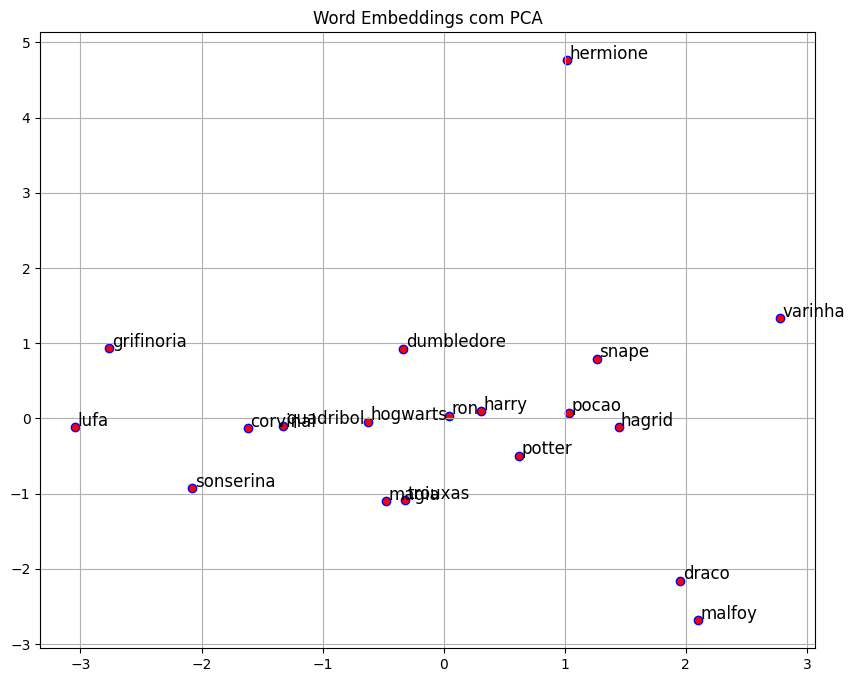

In [36]:
palavras_hp = [
    'harry', 'potter', 'ron', 'hermione', 'dumbledore', 'snape', 'draco',
    'varinha', 'pocao', 'trouxas', 'magia', 'quadribol', 'grifinoria', 
    'sonserina', 'corvinal', 'lufa', 'hogwarts', 'malfoy', 'hagrid'
]

plot_embeddings(model, palavras_hp)